In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dansbecker/dogs-gone-sideways")

print("Path to dataset files:", path)

100%|██████████| 23.0M/23.0M [00:01<00:00, 15.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/dansbecker/dogs-gone-sideways/versions/1


In [2]:
!cp -r /root/.cache/kagglehub/datasets/dansbecker/dogs-gone-sideways/versions/1 /content

In [3]:
from keras.applications.resnet50 import ResNet50
from keras import Sequential
from keras.layers import Dense, Flatten

In [4]:
base_model = ResNet50(weights='imagenet', include_top=False)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [27]:
#weights_url = "https://storage.googleapis.com/tensorflow/keras-applications/resnet/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5"
weights_url = "/content/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5"


In [28]:
model = Sequential()

In [29]:
from keras.applications.resnet50 import ResNet50
from keras import Sequential
from keras.layers import Dense, Flatten, Input

# Define input shape explicitly
input_shape = (224, 224, 3)  # Adjust if your images have different dimensions

# Create the base model
base_model = ResNet50(weights=weights_url,pooling ='avg', include_top=False, input_shape=input_shape)

# Create the Sequential model with an Input layer
model = Sequential()
model.add(base_model)
model.add(Dense(2, activation='softmax'))

In [30]:
model.layers[0].trainable = False

In [31]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         4,098 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,591,810 (90.00 MB)

 Trainable params: 4,098 (16.01 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [32]:
model.layers[0]

<Functional name=resnet50, built=True>

In [33]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [35]:
!pwd

/content


In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_dir = '/content/1/train'
val_data_dir = '/content/1/val'  # Path to the validation data directory
image_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.8, 1.2],  # Adjust brightness between 80% and 120%
    zoom_range=[0.8, 1.2],  # Zoom in or out between 80% and 120%
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Create validation data generator
val_datagen = ImageDataGenerator()  # Only rescale for validation

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 220 images belonging to 2 classes.
Found 217 images belonging to 2 classes.


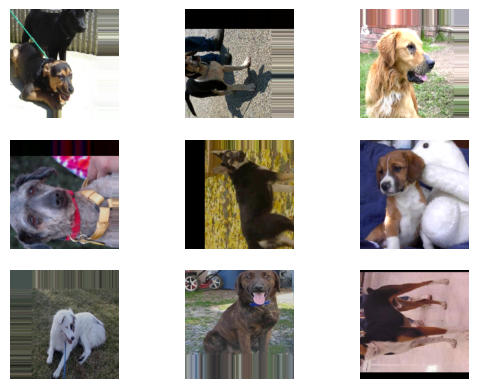

In [37]:
import matplotlib.pyplot as plt

augmented_images, labels = next(train_generator)

# Normalize pixel values to 0-1
augmented_images = augmented_images / 255.0  # If your images are in the range of 0-255

# Display a few augmented images
for i in range(9):  # Display 9 images
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i])
    plt.axis('off')

plt.show()

In [38]:
augmented_images.shape

(32, 224, 224, 3)

In [39]:
model.fit(train_generator,validation_data=val_generator , epochs = 2)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
7/7 ━━━━━━━━━━━━━━━━━━━━ 83s 11s/step - accuracy: 0.5866 - loss: 0.8983 - val_accuracy: 0.5714 - val_loss: 0.8720
Epoch 2/2
7/7 ━━━━━━━━━━━━━━━━━━━━ 79s 12s/step - accuracy: 0.6905 - loss: 0.6025 - val_accuracy: 0.8710 - val_loss: 0.3350


In [40]:
import numpy as np
np.argmax(model.predict(val_generator), axis = 1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step


array([1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
val_generator.index_array

array([ 1, 15, 13, 18,  4,  5, 12, 17,  0,  9,  2,  3, 19,  6,  7, 11, 14,
        8, 10, 16])

In [41]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

# Get true labels from the validation generator
y_true = val_generator.classes

# Predict labels for the validation data
y_pred = model.predict(val_generator)
y_pred = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
print(cm)
print("Accuracy :",accuracy_score(y_true, y_pred))

7/7 ━━━━━━━━━━━━━━━━━━━━ 33s 5s/step
Confusion Matrix:
[[68 42]
 [56 51]]
Accuracy : 0.5483870967741935
